In [100]:
import stockfinder.core as core
import sqlite3
import time
import logging

import importlib
importlib.reload(core)
importlib.reload(logging)

USE_INIT = False

sysdate = time.strftime('%Y%m%d')
print('SYSDATE: [{}]'.format(sysdate))

if USE_INIT:
    core.init_database(True)
    core.fill_calendar('2018')
    core.fill_krx_base(core.MARKET_KOSPI)
    # core.fill_krx_base(core.MARKET_KOSDAQ)

with core.DBConn() as conn:
    cur = conn.cursor()
    cur.execute('''select *
                     from calendar
                    where work = 'Y'
                      and date < ?
                   order by date desc
                   ''', (sysdate, ))
    dates = []
    for d in cur:    
        dates.append(d[0])
    cur.close()

for date in dates:
    try:
        core.fill_krx_rank(date)
    except:
        break

core.fill_indices()

print('Complete')
conn.close()

SYSDATE: [20180924]


D:\Workspace\stockfinder\stockfinder\core.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[k][i] = df['close'][i]


GENERATE INDICES. SYMBOL: 000020, ELAPSED: 0.969
GENERATE INDICES. SYMBOL: 000030, ELAPSED: 0.991
GENERATE INDICES. SYMBOL: 000040, ELAPSED: 0.973
GENERATE INDICES. SYMBOL: 000050, ELAPSED: 0.953
GENERATE INDICES. SYMBOL: 000060, ELAPSED: 0.932
GENERATE INDICES. SYMBOL: 000070, ELAPSED: 0.903
GENERATE INDICES. SYMBOL: 000080, ELAPSED: 0.959
GENERATE INDICES. SYMBOL: 000100, ELAPSED: 0.954
GENERATE INDICES. SYMBOL: 000120, ELAPSED: 0.899
GENERATE INDICES. SYMBOL: 000140, ELAPSED: 0.934
GENERATE INDICES. SYMBOL: 000150, ELAPSED: 0.915
GENERATE INDICES. SYMBOL: 000180, ELAPSED: 0.857
GENERATE INDICES. SYMBOL: 000210, ELAPSED: 0.872
GENERATE INDICES. SYMBOL: 000220, ELAPSED: 0.983
GENERATE INDICES. SYMBOL: 000230, ELAPSED: 0.947
GENERATE INDICES. SYMBOL: 000240, ELAPSED: 0.947
GENERATE INDICES. SYMBOL: 000250, ELAPSED: 0.971
GENERATE INDICES. SYMBOL: 000270, ELAPSED: 0.936
GENERATE INDICES. SYMBOL: 000300, ELAPSED: 0.953
GENERATE INDICES. SYMBOL: 000320, ELAPSED: 0.981
GENERATE INDICES. SY

GENERATE INDICES. SYMBOL: 003490, ELAPSED: 0.945
GENERATE INDICES. SYMBOL: 003520, ELAPSED: 0.889
GENERATE INDICES. SYMBOL: 003530, ELAPSED: 0.978
GENERATE INDICES. SYMBOL: 003540, ELAPSED: 0.890
GENERATE INDICES. SYMBOL: 003550, ELAPSED: 1.045
GENERATE INDICES. SYMBOL: 003560, ELAPSED: 0.956
GENERATE INDICES. SYMBOL: 003570, ELAPSED: 0.937
GENERATE INDICES. SYMBOL: 003580, ELAPSED: 0.938
GENERATE INDICES. SYMBOL: 003610, ELAPSED: 0.915
GENERATE INDICES. SYMBOL: 003620, ELAPSED: 0.894
GENERATE INDICES. SYMBOL: 003650, ELAPSED: 0.931
GENERATE INDICES. SYMBOL: 003670, ELAPSED: 0.959
GENERATE INDICES. SYMBOL: 003680, ELAPSED: 0.970
GENERATE INDICES. SYMBOL: 003690, ELAPSED: 0.954
GENERATE INDICES. SYMBOL: 003720, ELAPSED: 0.993
GENERATE INDICES. SYMBOL: 003780, ELAPSED: 0.946
GENERATE INDICES. SYMBOL: 003800, ELAPSED: 0.998
GENERATE INDICES. SYMBOL: 003830, ELAPSED: 1.028
GENERATE INDICES. SYMBOL: 003850, ELAPSED: 0.940
GENERATE INDICES. SYMBOL: 003920, ELAPSED: 0.900
GENERATE INDICES. SY

GENERATE INDICES. SYMBOL: 008060, ELAPSED: 0.931
GENERATE INDICES. SYMBOL: 008110, ELAPSED: 0.963
GENERATE INDICES. SYMBOL: 008250, ELAPSED: 1.035
GENERATE INDICES. SYMBOL: 008260, ELAPSED: 0.976
GENERATE INDICES. SYMBOL: 008290, ELAPSED: 1.001
GENERATE INDICES. SYMBOL: 008350, ELAPSED: 0.880
GENERATE INDICES. SYMBOL: 008370, ELAPSED: 0.950
GENERATE INDICES. SYMBOL: 008420, ELAPSED: 0.912
GENERATE INDICES. SYMBOL: 008470, ELAPSED: 0.905
GENERATE INDICES. SYMBOL: 008490, ELAPSED: 1.018
GENERATE INDICES. SYMBOL: 008500, ELAPSED: 1.000
GENERATE INDICES. SYMBOL: 008560, ELAPSED: 0.999
GENERATE INDICES. SYMBOL: 008600, ELAPSED: 1.108
GENERATE INDICES. SYMBOL: 008700, ELAPSED: 0.899
GENERATE INDICES. SYMBOL: 008730, ELAPSED: 0.891
GENERATE INDICES. SYMBOL: 008770, ELAPSED: 0.973
GENERATE INDICES. SYMBOL: 008800, ELAPSED: 1.020
GENERATE INDICES. SYMBOL: 008830, ELAPSED: 0.966
GENERATE INDICES. SYMBOL: 008870, ELAPSED: 0.950
GENERATE INDICES. SYMBOL: 008930, ELAPSED: 1.005
GENERATE INDICES. SY

GENERATE INDICES. SYMBOL: 016090, ELAPSED: 0.978
GENERATE INDICES. SYMBOL: 016100, ELAPSED: 0.930
GENERATE INDICES. SYMBOL: 016170, ELAPSED: 0.960
GENERATE INDICES. SYMBOL: 016250, ELAPSED: 0.984
GENERATE INDICES. SYMBOL: 016360, ELAPSED: 0.955
GENERATE INDICES. SYMBOL: 016380, ELAPSED: 1.059
GENERATE INDICES. SYMBOL: 016450, ELAPSED: 0.979
GENERATE INDICES. SYMBOL: 016580, ELAPSED: 1.006
GENERATE INDICES. SYMBOL: 016590, ELAPSED: 0.900
GENERATE INDICES. SYMBOL: 016600, ELAPSED: 0.875
GENERATE INDICES. SYMBOL: 016610, ELAPSED: 0.880
GENERATE INDICES. SYMBOL: 016670, ELAPSED: 0.941
GENERATE INDICES. SYMBOL: 016710, ELAPSED: 0.901
GENERATE INDICES. SYMBOL: 016740, ELAPSED: 1.005
GENERATE INDICES. SYMBOL: 016790, ELAPSED: 0.856
GENERATE INDICES. SYMBOL: 016800, ELAPSED: 0.981
GENERATE INDICES. SYMBOL: 016880, ELAPSED: 0.964
GENERATE INDICES. SYMBOL: 016920, ELAPSED: 0.993
GENERATE INDICES. SYMBOL: 017000, ELAPSED: 1.041
GENERATE INDICES. SYMBOL: 017040, ELAPSED: 0.962
GENERATE INDICES. SY

GENERATE INDICES. SYMBOL: 030190, ELAPSED: 0.803
GENERATE INDICES. SYMBOL: 030200, ELAPSED: 0.842
GENERATE INDICES. SYMBOL: 030210, ELAPSED: 0.927
GENERATE INDICES. SYMBOL: 030270, ELAPSED: 0.817
GENERATE INDICES. SYMBOL: 030350, ELAPSED: 0.905
GENERATE INDICES. SYMBOL: 030520, ELAPSED: 0.816
GENERATE INDICES. SYMBOL: 030530, ELAPSED: 0.784
GENERATE INDICES. SYMBOL: 030610, ELAPSED: 0.931
GENERATE INDICES. SYMBOL: 030720, ELAPSED: 0.809
GENERATE INDICES. SYMBOL: 030790, ELAPSED: 0.968
GENERATE INDICES. SYMBOL: 030960, ELAPSED: 0.757
GENERATE INDICES. SYMBOL: 031310, ELAPSED: 0.766
GENERATE INDICES. SYMBOL: 031330, ELAPSED: 0.751
GENERATE INDICES. SYMBOL: 031390, ELAPSED: 0.778
GENERATE INDICES. SYMBOL: 031430, ELAPSED: 0.790
GENERATE INDICES. SYMBOL: 031440, ELAPSED: 0.772
GENERATE INDICES. SYMBOL: 031510, ELAPSED: 0.744
GENERATE INDICES. SYMBOL: 031820, ELAPSED: 0.798
GENERATE INDICES. SYMBOL: 031860, ELAPSED: 0.745
GENERATE INDICES. SYMBOL: 031980, ELAPSED: 0.724
GENERATE INDICES. SY

GENERATE INDICES. SYMBOL: 039290, ELAPSED: 0.805
GENERATE INDICES. SYMBOL: 039310, ELAPSED: 0.745
GENERATE INDICES. SYMBOL: 039340, ELAPSED: 0.760
GENERATE INDICES. SYMBOL: 039420, ELAPSED: 0.769
GENERATE INDICES. SYMBOL: 039440, ELAPSED: 0.750
GENERATE INDICES. SYMBOL: 039490, ELAPSED: 0.777
GENERATE INDICES. SYMBOL: 039560, ELAPSED: 0.792
GENERATE INDICES. SYMBOL: 039570, ELAPSED: 0.730
GENERATE INDICES. SYMBOL: 039610, ELAPSED: 0.791
GENERATE INDICES. SYMBOL: 039670, ELAPSED: 0.763
GENERATE INDICES. SYMBOL: 039740, ELAPSED: 0.752
GENERATE INDICES. SYMBOL: 039830, ELAPSED: 0.723
GENERATE INDICES. SYMBOL: 039840, ELAPSED: 0.792
GENERATE INDICES. SYMBOL: 039860, ELAPSED: 0.775
GENERATE INDICES. SYMBOL: 039980, ELAPSED: 0.836
GENERATE INDICES. SYMBOL: 040160, ELAPSED: 0.789
GENERATE INDICES. SYMBOL: 040300, ELAPSED: 0.767
GENERATE INDICES. SYMBOL: 040350, ELAPSED: 0.841
GENERATE INDICES. SYMBOL: 040420, ELAPSED: 0.756
GENERATE INDICES. SYMBOL: 040610, ELAPSED: 0.804
GENERATE INDICES. SY

GENERATE INDICES. SYMBOL: 052790, ELAPSED: 0.753
GENERATE INDICES. SYMBOL: 052860, ELAPSED: 0.836
GENERATE INDICES. SYMBOL: 052900, ELAPSED: 0.806
GENERATE INDICES. SYMBOL: 053030, ELAPSED: 0.771
GENERATE INDICES. SYMBOL: 053050, ELAPSED: 0.773
GENERATE INDICES. SYMBOL: 053060, ELAPSED: 0.761
GENERATE INDICES. SYMBOL: 053110, ELAPSED: 0.861
GENERATE INDICES. SYMBOL: 053160, ELAPSED: 0.852
GENERATE INDICES. SYMBOL: 053210, ELAPSED: 0.790
GENERATE INDICES. SYMBOL: 053260, ELAPSED: 0.736
GENERATE INDICES. SYMBOL: 053270, ELAPSED: 0.809
GENERATE INDICES. SYMBOL: 053280, ELAPSED: 0.714
GENERATE INDICES. SYMBOL: 053290, ELAPSED: 0.767
GENERATE INDICES. SYMBOL: 053300, ELAPSED: 0.809
GENERATE INDICES. SYMBOL: 053350, ELAPSED: 0.733
GENERATE INDICES. SYMBOL: 053450, ELAPSED: 0.751
GENERATE INDICES. SYMBOL: 053590, ELAPSED: 0.806
GENERATE INDICES. SYMBOL: 053610, ELAPSED: 0.792
GENERATE INDICES. SYMBOL: 053620, ELAPSED: 0.768
GENERATE INDICES. SYMBOL: 053660, ELAPSED: 0.779
GENERATE INDICES. SY

GENERATE INDICES. SYMBOL: 067570, ELAPSED: 0.776
GENERATE INDICES. SYMBOL: 067630, ELAPSED: 0.791
GENERATE INDICES. SYMBOL: 067730, ELAPSED: 0.839
GENERATE INDICES. SYMBOL: 067770, ELAPSED: 0.727
GENERATE INDICES. SYMBOL: 067830, ELAPSED: 0.866
GENERATE INDICES. SYMBOL: 067900, ELAPSED: 0.835
GENERATE INDICES. SYMBOL: 067920, ELAPSED: 0.788
GENERATE INDICES. SYMBOL: 067990, ELAPSED: 0.745
GENERATE INDICES. SYMBOL: 068050, ELAPSED: 0.732
GENERATE INDICES. SYMBOL: 068240, ELAPSED: 0.760
GENERATE INDICES. SYMBOL: 068270, ELAPSED: 0.732
GENERATE INDICES. SYMBOL: 068290, ELAPSED: 0.766
GENERATE INDICES. SYMBOL: 068330, ELAPSED: 0.839
GENERATE INDICES. SYMBOL: 068400, ELAPSED: 0.923
GENERATE INDICES. SYMBOL: 068760, ELAPSED: 0.765
GENERATE INDICES. SYMBOL: 068790, ELAPSED: 0.828
GENERATE INDICES. SYMBOL: 068930, ELAPSED: 0.816
GENERATE INDICES. SYMBOL: 068940, ELAPSED: 0.799
GENERATE INDICES. SYMBOL: 069080, ELAPSED: 0.729
GENERATE INDICES. SYMBOL: 069110, ELAPSED: 0.759
GENERATE INDICES. SY

GENERATE INDICES. SYMBOL: 086250, ELAPSED: 0.792
GENERATE INDICES. SYMBOL: 086280, ELAPSED: 0.869
GENERATE INDICES. SYMBOL: 086390, ELAPSED: 0.834
GENERATE INDICES. SYMBOL: 086450, ELAPSED: 0.758
GENERATE INDICES. SYMBOL: 086520, ELAPSED: 0.882
GENERATE INDICES. SYMBOL: 086670, ELAPSED: 0.873
GENERATE INDICES. SYMBOL: 086790, ELAPSED: 0.832
GENERATE INDICES. SYMBOL: 086820, ELAPSED: 0.669
GENERATE INDICES. SYMBOL: 086890, ELAPSED: 0.875
GENERATE INDICES. SYMBOL: 086900, ELAPSED: 0.864
GENERATE INDICES. SYMBOL: 086960, ELAPSED: 0.808
GENERATE INDICES. SYMBOL: 086980, ELAPSED: 0.829
GENERATE INDICES. SYMBOL: 087010, ELAPSED: 0.788
GENERATE INDICES. SYMBOL: 087260, ELAPSED: 0.774
GENERATE INDICES. SYMBOL: 087600, ELAPSED: 0.803
GENERATE INDICES. SYMBOL: 087730, ELAPSED: 0.788
GENERATE INDICES. SYMBOL: 088130, ELAPSED: 0.824
GENERATE INDICES. SYMBOL: 088260, ELAPSED: 0.740
GENERATE INDICES. SYMBOL: 088290, ELAPSED: 0.910
GENERATE INDICES. SYMBOL: 088350, ELAPSED: 0.817
GENERATE INDICES. SY

GENERATE INDICES. SYMBOL: 103230, ELAPSED: 0.841
GENERATE INDICES. SYMBOL: 103590, ELAPSED: 0.942
GENERATE INDICES. SYMBOL: 104040, ELAPSED: 0.919
GENERATE INDICES. SYMBOL: 104200, ELAPSED: 0.894
GENERATE INDICES. SYMBOL: 104460, ELAPSED: 0.889
GENERATE INDICES. SYMBOL: 104480, ELAPSED: 0.775
GENERATE INDICES. SYMBOL: 104540, ELAPSED: 0.824
GENERATE INDICES. SYMBOL: 104700, ELAPSED: 0.834
GENERATE INDICES. SYMBOL: 104830, ELAPSED: 0.750
GENERATE INDICES. SYMBOL: 105330, ELAPSED: 0.874
GENERATE INDICES. SYMBOL: 105550, ELAPSED: 0.818
GENERATE INDICES. SYMBOL: 105560, ELAPSED: 0.833
GENERATE INDICES. SYMBOL: 105630, ELAPSED: 0.799
GENERATE INDICES. SYMBOL: 105740, ELAPSED: 0.745
GENERATE INDICES. SYMBOL: 105840, ELAPSED: 0.800
GENERATE INDICES. SYMBOL: 106080, ELAPSED: 0.755
GENERATE INDICES. SYMBOL: 106190, ELAPSED: 0.807
GENERATE INDICES. SYMBOL: 106240, ELAPSED: 0.867
GENERATE INDICES. SYMBOL: 106520, ELAPSED: 0.826
GENERATE INDICES. SYMBOL: 107590, ELAPSED: 0.815
GENERATE INDICES. SY

GENERATE INDICES. SYMBOL: 141070, ELAPSED: 0.831
GENERATE INDICES. SYMBOL: 141080, ELAPSED: 0.817
GENERATE INDICES. SYMBOL: 142210, ELAPSED: 0.798
GENERATE INDICES. SYMBOL: 142280, ELAPSED: 0.866
GENERATE INDICES. SYMBOL: 142760, ELAPSED: 0.828
GENERATE INDICES. SYMBOL: 143160, ELAPSED: 0.841
GENERATE INDICES. SYMBOL: 143210, ELAPSED: 0.821
GENERATE INDICES. SYMBOL: 143240, ELAPSED: 0.921
GENERATE INDICES. SYMBOL: 143540, ELAPSED: 0.840
GENERATE INDICES. SYMBOL: 144510, ELAPSED: 0.825
GENERATE INDICES. SYMBOL: 144620, ELAPSED: 0.798
GENERATE INDICES. SYMBOL: 144960, ELAPSED: 0.886
GENERATE INDICES. SYMBOL: 145020, ELAPSED: 0.773
GENERATE INDICES. SYMBOL: 145210, ELAPSED: 0.758
GENERATE INDICES. SYMBOL: 145270, ELAPSED: 0.746
GENERATE INDICES. SYMBOL: 145720, ELAPSED: 0.881
GENERATE INDICES. SYMBOL: 145990, ELAPSED: 0.818
GENERATE INDICES. SYMBOL: 147760, ELAPSED: 0.858
GENERATE INDICES. SYMBOL: 147830, ELAPSED: 1.029
GENERATE INDICES. SYMBOL: 148140, ELAPSED: 0.953
GENERATE INDICES. SY

GENERATE INDICES. SYMBOL: 214150, ELAPSED: 0.923
GENERATE INDICES. SYMBOL: 214180, ELAPSED: 0.783
GENERATE INDICES. SYMBOL: 214270, ELAPSED: 0.794
GENERATE INDICES. SYMBOL: 214310, ELAPSED: 0.805
GENERATE INDICES. SYMBOL: 214320, ELAPSED: 0.746
GENERATE INDICES. SYMBOL: 214330, ELAPSED: 0.830
GENERATE INDICES. SYMBOL: 214370, ELAPSED: 0.831
GENERATE INDICES. SYMBOL: 214390, ELAPSED: 0.897
GENERATE INDICES. SYMBOL: 214420, ELAPSED: 0.859
GENERATE INDICES. SYMBOL: 214430, ELAPSED: 0.786
GENERATE INDICES. SYMBOL: 214450, ELAPSED: 0.829
GENERATE INDICES. SYMBOL: 214680, ELAPSED: 0.895
GENERATE INDICES. SYMBOL: 214870, ELAPSED: 0.921
GENERATE INDICES. SYMBOL: 215000, ELAPSED: 0.839
GENERATE INDICES. SYMBOL: 215090, ELAPSED: 0.825
GENERATE INDICES. SYMBOL: 215100, ELAPSED: 0.810
GENERATE INDICES. SYMBOL: 215200, ELAPSED: 0.863
GENERATE INDICES. SYMBOL: 215360, ELAPSED: 0.762
GENERATE INDICES. SYMBOL: 215380, ELAPSED: 0.727
GENERATE INDICES. SYMBOL: 215480, ELAPSED: 0.775
GENERATE INDICES. SY

GENERATE INDICES. SYMBOL: 272290, ELAPSED: 1.001
GENERATE INDICES. SYMBOL: 272450, ELAPSED: 0.794
GENERATE INDICES. SYMBOL: 272550, ELAPSED: 0.784
GENERATE INDICES. SYMBOL: 273060, ELAPSED: 0.816
GENERATE INDICES. SYMBOL: 275630, ELAPSED: 0.746
GENERATE INDICES. SYMBOL: 276920, ELAPSED: 0.789
GENERATE INDICES. SYMBOL: 277070, ELAPSED: 0.778
GENERATE INDICES. SYMBOL: 277410, ELAPSED: 0.842
GENERATE INDICES. SYMBOL: 277480, ELAPSED: 0.857
GENERATE INDICES. SYMBOL: 279410, ELAPSED: 0.994
GENERATE INDICES. SYMBOL: 280360, ELAPSED: 0.765
GENERATE INDICES. SYMBOL: 281410, ELAPSED: 0.769
GENERATE INDICES. SYMBOL: 281740, ELAPSED: 1.006
GENERATE INDICES. SYMBOL: 281820, ELAPSED: 0.886
GENERATE INDICES. SYMBOL: 282330, ELAPSED: 0.793
GENERATE INDICES. SYMBOL: 282690, ELAPSED: 1.097
GENERATE INDICES. SYMBOL: 284620, ELAPSED: 0.810
GENERATE INDICES. SYMBOL: 284740, ELAPSED: 0.814
GENERATE INDICES. SYMBOL: 285130, ELAPSED: 0.769
GENERATE INDICES. SYMBOL: 286940, ELAPSED: 0.707
GENERATE INDICES. SY

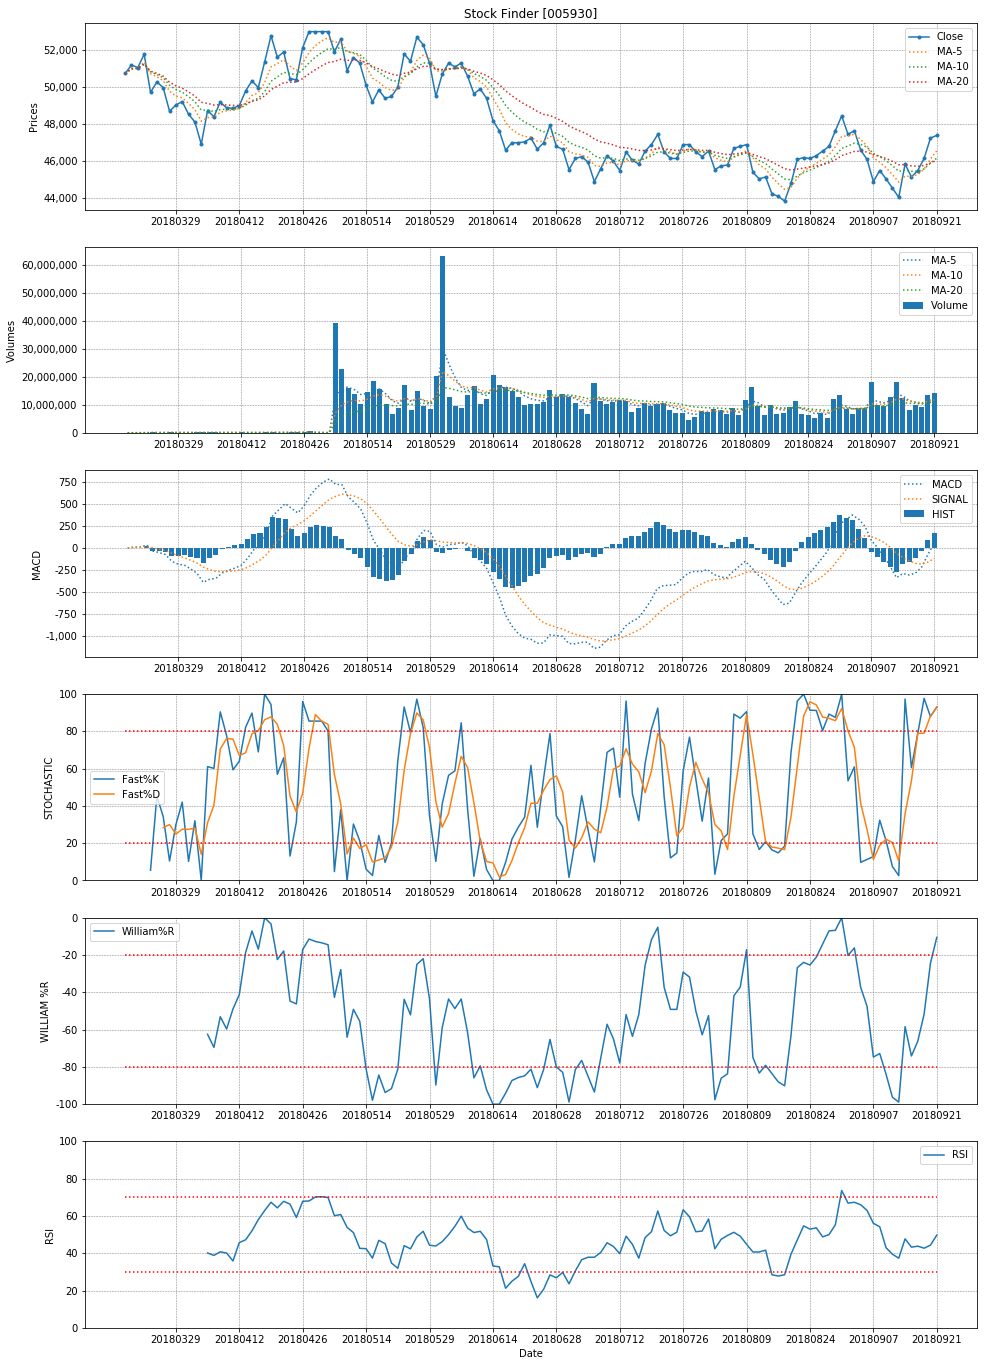

In [102]:
import stockfinder.core as core
import stockfinder.chart as chart
import matplotlib.pyplot as plt
import sqlite3
import time

import importlib
importlib.reload(core)
importlib.reload(chart)

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 28)
chart.draw_basic_chart('005930')
plt.show()